Pengumpulan data
Data “Data Volume Pengangkutan Sampah di Kali Sungai Situ Waduk Tahun 2021” didapatkan dari https://katalog.data.go.id/dataset/bb5b8c5c-f202-4552-8c22-7be1fda8e366/resource/e65bcf8a-f949-46db-b116-2bc7cad516cd berbentuk .xls atau excel yang berversi lama sehingga saya melakukan convert versi dengan versi yang sesuai dengan versi yang dapat dibuka pada library pandas dapat buka yaitu xlsx
Setelah itu saya membuka data itu serta memahami data tersebut dengan metadata sebagai berikut


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

<ul>
<li>periode_data : Penjelasan Periode Data 1 Tahun Sekali
<li>bulan : Bulan
<li>titik_lokasi : Titik Lokasi Penampungan Sampah
<li>kecamatan : Kecamatan dimana titik lokasi penampungan sampah berada
<li>wilayah : Wilayah dimana titik lokasi penampungan sampah berada
<li>panjang_atau_luas : Panjang atau luas area penanganan sampah
<li>satuan_panjang_luas : Satuan Panjang atau Luas
<li>tanggal : Tanggal
<li>volume_sampah_perhari : Volume Sampah per Hari (dengan satuan m3)
<ul>

<h3>Pengumpulan data<h3>

In [3]:
data = pd.read_excel("dataset/Data Volume Pengangkutan Sampah di Kali Sungai Situ Waduk Tahun 2021.xlsx")

<h3>data information</h3>

In [5]:
data.columns

Index(['periode_data', 'bulan', 'titik_lokasi', 'kecamatan', 'wilayah',
       'panjang_atau_luas', 'satuan_panjang_luas', 'tanggal',
       'volume_sampah_perhari'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647169 entries, 0 to 647168
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   periode_data           647169 non-null  int64 
 1   bulan                  647169 non-null  int64 
 2   titik_lokasi           647169 non-null  object
 3   kecamatan              647169 non-null  object
 4   wilayah                647169 non-null  object
 5   panjang_atau_luas      633235 non-null  object
 6   satuan_panjang_luas    522158 non-null  object
 7   tanggal                647169 non-null  int64 
 8   volume_sampah_perhari  647166 non-null  object
dtypes: int64(3), object(6)
memory usage: 44.4+ MB


Beberapa data pada kolom panjang_satuan_luas dan volume_sampah_perhari merupakan objek, yang menunjukkan bahwa data tersebut tidak sesuai dengan yang diharapkan, yaitu berupa integer. Hal ini dapat dibuktikan ketika kita melakukan deskripsi data.

<h3>Data Describe

In [5]:
data.describe()

,periode_data,bulan,tanggal
count,647169.000000,647169.000000,647169.000000
mean,202106.547494,6.547494,15.762723
std,3.448423,3.448423,8.820564
min,202101.000000,1.000000,1.000000
25%,202104.000000,4.000000,8.000000
50%,202107.000000,7.000000,16.000000
75%,202110.000000,10.000000,23.000000
max,202112.000000,12.000000,31.000000


Data yang dimiliki beberapa keunikan ketika dilakukan describe karena data yang dapat dilakukan hanya beberapa kolum saja yang betipe integer dengan bgini kita akan melakukan pengecheck data apa saja yang perlu diubah menjadi integer untuk dilakukan pembelajaran atau analisa selanjutnya

sebaiknya kita melakukan anilisa lebih awal ktika seluruh data sudah baik dan layak untuk diproses dan tidak memiliki nilai kosong atau NAN

In [6]:
data.isnull().sum()

periode_data                  0
bulan                         0
titik_lokasi                  0
kecamatan                     0
wilayah                       0
panjang_atau_luas         13934
satuan_panjang_luas      125011
tanggal                       0
volume_sampah_perhari         3
dtype: int64

deskripsi berikut ini menunjukkan kalau 'panjang_atau_luas' mmemiliki 13034 dan satuan satuan_panjang_luas 125011 nilai kosong hal ini menunjukkan kalau kita harus membuat pergantian data atau dapat memutuskan dengan menghapus beberapa data trtentu karena memeiliki perbandingan yang kecil dibanding seluruh data yang memeiliki total 600.000 

baik pertama kita akan melakukan analisa terhadap salah satu kolum yaitu 'satuan_panjang_luas' mengetahui nilai apa sih yang paling banyak diantara beberapa kolum agar kita dapat menggantikannya dnegan yang lebih sama 

In [6]:
print("Nilai unik pada kolom 'satuan_panjang_luas':")
print(data["satuan_panjang_luas"].unique())
print(data["satuan_panjang_luas"].value_counts())

print("\nNilai unik pada kolom 'wilayah':")
print(data["wilayah"].unique())

print("\nNilai unik pada kolom 'bulan':")
print(sorted(data["bulan"].unique()))

Nilai unik pada kolom 'satuan_panjang_luas':
['m' nan 'M' 'Ha' 'H' 'HA' 'm?' 'm2' 'km' 'hektar' 'Hektar' 'M?' 'ha'
 'hectare']
satuan_panjang_luas
m          500182
Ha          16954
M            2289
m?            673
H             543
HA            515
km            273
ha            273
hektar        123
Hektar        123
m2            120
M?             59
hectare        31
Name: count, dtype: int64

Nilai unik pada kolom 'wilayah':
['Jakarta Pusat' 'Jakarta Utara' 'Jakarta Barat' 'Jakarta Timur'
 'Jakarta Selatan']

Nilai unik pada kolom 'bulan':
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


dengan data diatas dapat diketahui bahasa meter memeiliki pengarauh yang sangat besar dibanding yang laiinya yaitu 500.000 data yang membuat kita dapat mengganti nilai NA menjadi m agar tidak ada data kosong pada data lalu selanjutnya melakukan pengecheckan pada data alinnya apakah ada data yang aneh 

In [7]:
print("\nNilai unik pada kolom 'Kecamatan':")
print(data["kecamatan"].unique())


Nilai unik pada kolom 'Kecamatan':
['Sawah Besar' 'Senen' 'Cilincing' 'Kebon Jeruk' 'Tambora' 'Kelapa Gading'
 'Kembangan' 'Palmerah' 'Tanjung Priok' 'Menteng' 'Tanah Abang'
 'Tamansari' 'Penjaringan' 'Pasar Rebo' 'Kramat Jati' 'Pademangan'
 'Matraman' 'Duren Sawit' 'Kebayoran Baru' 'Jatinegara' 'Ciracas'
 'Cipayung' 'Pulo Gadung' 'Jagakarsa' 'Pasar Minggu' 'Kebayoran Lama'
 'Pesanggrahan' 'Makasar' 'Koja' 'Pancoran' 'Setiabudi' 'Mampang Prapatan'
 'Kalideres' 'Cilandak' 'Cengkareng' 'Tebet' 'Grogol Petamburan'
 'Cempaka Putih' 'Gambir' 'Kemayoran' 'Cakung' 'Johar Baru']


data tampak baik baik saja pada data kecamatan hal ini dapat dikembangkan lagi nantinya

In [8]:
print("\nNilai unik pada kolom 'panjang_atau_luas':")
print(data["panjang_atau_luas"].unique())


Nilai unik pada kolom 'panjang_atau_luas':
[600 300 400 500 200 1000 1500 2000 2500 '3500/70' '1400/10' '1100/10'
 '1000/10' '700/10' '3000/15' 36800 36617 '1000/7' '700/15' '1000/6'
 '700/6' '800/7' '1000/8' datetime.datetime(2000, 6, 1, 0, 0)
 datetime.datetime(2000, 10, 1, 0, 0) 1100 1800 815 780 1450 1200 1750
 1102 150 850 250 2.5 100 350 '1000/5' '2000/15'
 datetime.datetime(2000, 5, 1, 0, 0) '1000/4' 1 '1500/10'
 datetime.datetime(2000, 4, 1, 0, 0) '700/8' '800/4' '1000/30' '700/5'
 '700/4' '700/3' '1000/3' '900/5' '500/6' '500/10' '300/3' '500/5'
 '3000/32' '1000/2' '200/17' '500/3' '500/4' '500/8' '600/3' '600/5'
 '2000/3.5' '800/3' 8 '1500/35' '1300/35' '900/35' '1000/35' '900/10'
 '600/4' '1200/5' '1500/6' '1500/4' '450/6' '800m' 1300 0.9 800 700 1.5 3
 nan 2 610 900 950 0.0875 755 663 522 795 650 745 925 24 750 392 320 1968
 573 31.5 550 310 360 331 1070 1172 1502 839 627 1320 420 1359 1247 1642
 1120 1060 2200 1820 1350 821 2700 1550 1360 '400/3' '350/4' '450/4'
 '600/2.5

data panjang atau luas memiliki kanehan yang dimana isi data merupakan sebuah objek dan juga data tersebut tidak merupkan nilai bulat oleh sebaba itu kita bisa membuat nilai diatas menjadi data integre untuk nalaisa lebih baik selnajutnya

<h3>panjang_atau_luas solve<h3>

In [6]:
data.tail()

,periode_data,bulan,titik_lokasi,kecamatan,wilayah,panjang_atau_luas,satuan_panjang_luas,tanggal,volume_sampah_perhari
647164,202112,12,Saluran PHB Joe Jln. Nangka,Jagakarsa,Jakarta Selatan,1500,m,4,0.3
647165,202112,12,Kali Baru Barat Kahfi Cabang Tengah -Timbul,Jagakarsa,Jakarta Selatan,2527,m,4,0
647166,202112,12,Kali Baru Barat HULU Jl. Kahfi Gg. Cipedak 5,Jagakarsa,Jakarta Selatan,1000,m,4,0.5
647167,202112,12,Kali Baru Barat Pintu Air Setu Babakan,Jagakarsa,Jakarta Selatan,1000,m,4,0.4
647168,202112,12,Kali Baru Barat Kahfi Depan BPPTL,Jagakarsa,Jakarta Selatan,4000,m,4,0


In [5]:
data.isnull().sum()

periode_data                  0
bulan                         0
titik_lokasi                  0
kecamatan                     0
wilayah                       0
panjang_atau_luas         13934
satuan_panjang_luas      125011
tanggal                       0
volume_sampah_perhari         3
dtype: int64

<h3>satuan panjang luas (meter)<h3>

In [56]:
# Mengganti NaN dengan modus (nilai yang paling sering muncul)
mode_value = data['satuan_panjang_luas'].mode()[0]
data['satuan_panjang_luas'] = data['satuan_panjang_luas'].fillna(mode_value)


<h3>Konversi Satuan<h3>

In [8]:
import datetime


In [38]:
import pandas as pd
import numpy as np
import datetime
import re  # Untuk menggunakan regular expression

# Fungsi untuk menangani nilai yang berupa string dengan satuan
def parse_and_convert(value):
    # Cek jika nilai berupa string yang mengandung "/"
    if isinstance(value, str):
        # Jika string mengandung "/"
        if '/' in value:
            # Misalnya '3500/70' menjadi 3500 / 70
            numerator, denominator = value.split('/')
            return float(numerator) / float(denominator)
        # Jika string mengandung satuan (misal '800m', '10kg')
        else:
            # Menggunakan regular expression untuk menangkap angka sebelum satuan
            match = re.match(r"([0-9\.]+)([a-zA-Z]*)", value)
            if match:
                return float(match.group(1))  # Mengembalikan angka tanpa satuan
            

    # Jika tipe data adalah datetime
    elif isinstance(value, datetime.datetime):
        return 0  # Jika datetime, kembalikan 0
    else:
       return float(value)  # Jika bisa diubah menjadi float

# Mengonversi kolom 'panjang_atau_luas' menjadi angka dengan fungsi khusus
data['panjang_atau_luas'] = data['panjang_atau_luas'].apply(parse_and_convert)

print(data)


        periode_data  bulan  \
0             202101      1   
1             202101      1   
2             202101      1   
3             202101      1   
4             202101      1   
...              ...    ...   
647164        202112     12   
647165        202112     12   
647166        202112     12   
647167        202112     12   
647168        202112     12   

                                             titik_lokasi    kecamatan  \
0       Kali / Sungai Ciliwung Jl. Antara - Pasar Baru...  Sawah Besar   
1             Kali / Sungai Ciliwung Kota Jl. Hayam Wuruk  Sawah Besar   
2            Kali / Sungai Ciliwung Ps. Baru Golden Truly  Sawah Besar   
3              Kali / Sungai Ciliwung Kota Jl. Ir. Juanda  Sawah Besar   
4               Kali / Sungai Ciliwung Pangeran Jayakarta  Sawah Besar   
...                                                   ...          ...   
647164                        Saluran PHB Joe Jln. Nangka    Jagakarsa   
647165        Kali Baru Barat Kahfi

In [41]:
# Menghitung jumlah kemunculan nilai yang mengandung '/'
count_with_slash = data['panjang_atau_luas'].apply(lambda x: isinstance(x, str) and '/' in x).value_counts()

print(count_with_slash)


panjang_atau_luas
False    647169
Name: count, dtype: int64


In [ ]:
# Mengonversi kolom 'panjang_atau_luas' ke numerik, dengan menangani error
data['panjang_atau_luas'] = pd.to_numeric(data['panjang_atau_luas'], errors='coerce')

# Mengganti NaN dengan 0
data['panjang_atau_luas'].fillna(0, inplace=True)


In [58]:


# Menangani satuan dan mengonversinya ke m²
conditions = [
    (data['satuan_panjang_luas'].str.lower() == 'm') | (data['satuan_panjang_luas'].str.lower() == 'm2'),  # m dan m2
    (data['satuan_panjang_luas'].str.lower() == 'ha') | (data['satuan_panjang_luas'].str.lower() == 'hektar') | (data['satuan_panjang_luas'].str.lower() == 'hectare'),  # ha/hektar/hectare
    (data['satuan_panjang_luas'].str.lower() == 'km'),  # km
    (data['satuan_panjang_luas'].str.lower() == 'h') | (data['satuan_panjang_luas'].str.lower() == 'ha')  # H
]

choices = [1, 10_000, 1_000_000, 10_000]

# Menggunakan np.select untuk menghitung panjang/luas dalam m²
data['panjang_atau_luas_in_m2'] = np.select(conditions, choices, default=np.nan) * data['panjang_atau_luas']

# Menampilkan hasil
print(data[['panjang_atau_luas', 'satuan_panjang_luas', 'panjang_atau_luas_in_m2']].head())

   panjang_atau_luas satuan_panjang_luas  panjang_atau_luas_in_m2
0              600.0                   m                    600.0
1              300.0                   m                    300.0
2              400.0                   m                    400.0
3              300.0                   m                    300.0
4              600.0                   m                    600.0


(array([6.26778e+05, 3.50900e+03, 3.66000e+02, 2.16000e+02, 6.78000e+02,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.23100e+03, 1.54000e+02]),
 array([    0. ,  4468.1,  8936.2, 13404.3, 17872.4, 22340.5, 26808.6,
        31276.7, 35744.8, 40212.9, 44681. ]),
 <BarContainer object of 10 artists>)

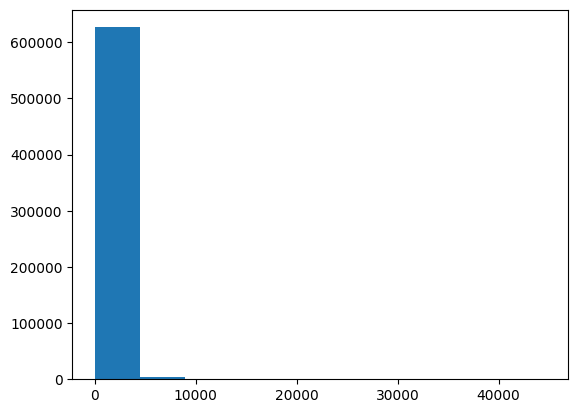

In [59]:
plt.hist(data['panjang_atau_luas'])

In [60]:
data.isnull().sum()

periode_data                   0
bulan                          0
titik_lokasi                   0
kecamatan                      0
wilayah                        0
panjang_atau_luas          14237
satuan_panjang_luas            0
tanggal                        0
volume_sampah_perhari          3
panjang_atau_luas_in_m2    14969
dtype: int64

In [61]:
# Menghapus baris dengan NaN pada kolom 'satuan_panjang_luas' atau 'panjang_atau_luas_in_m2'
data_cleaned = data.dropna(subset=['panjang_atau_luas', 'panjang_atau_luas_in_m2'])

print(data_cleaned)


        periode_data  bulan  \
0             202101      1   
1             202101      1   
2             202101      1   
3             202101      1   
4             202101      1   
...              ...    ...   
647164        202112     12   
647165        202112     12   
647166        202112     12   
647167        202112     12   
647168        202112     12   

                                             titik_lokasi    kecamatan  \
0       Kali / Sungai Ciliwung Jl. Antara - Pasar Baru...  Sawah Besar   
1             Kali / Sungai Ciliwung Kota Jl. Hayam Wuruk  Sawah Besar   
2            Kali / Sungai Ciliwung Ps. Baru Golden Truly  Sawah Besar   
3              Kali / Sungai Ciliwung Kota Jl. Ir. Juanda  Sawah Besar   
4               Kali / Sungai Ciliwung Pangeran Jayakarta  Sawah Besar   
...                                                   ...          ...   
647164                        Saluran PHB Joe Jln. Nangka    Jagakarsa   
647165        Kali Baru Barat Kahfi

In [62]:
data_cleaned.isnull().sum()

periode_data               0
bulan                      0
titik_lokasi               0
kecamatan                  0
wilayah                    0
panjang_atau_luas          0
satuan_panjang_luas        0
tanggal                    0
volume_sampah_perhari      3
panjang_atau_luas_in_m2    0
dtype: int64

In [63]:
data_cleaned[data_cleaned['volume_sampah_perhari'].isnull()]

,periode_data,bulan,titik_lokasi,kecamatan,wilayah,panjang_atau_luas,satuan_panjang_luas,tanggal,volume_sampah_perhari,panjang_atau_luas_in_m2
180,202101,1,Kali Pesanggrahan Jl Pos Pengumben Lama Srengseng,Kembangan,Jakarta Barat,1500.0,m,1,NaN,1500.0
5943,202101,1,PHB RW 02 JL Raya Kembangan,Kembangan,Jakarta Barat,500.0,m,21,NaN,500.0
146445,202101,1,KALI BETIK OUTLET BOULEVARD,Koja,Jakarta Utara,50.0,m,5,NaN,50.0


In [64]:
data_cleaned = data_cleaned.dropna(subset=['volume_sampah_perhari'])

In [65]:
data_cleaned.isnull().sum()

periode_data               0
bulan                      0
titik_lokasi               0
kecamatan                  0
wilayah                    0
panjang_atau_luas          0
satuan_panjang_luas        0
tanggal                    0
volume_sampah_perhari      0
panjang_atau_luas_in_m2    0
dtype: int64

In [66]:
import pandas as pd

# Menggunakan regex untuk menemukan nilai selain angka desimal
non_decimal_values = data_cleaned[~data_cleaned['volume_sampah_perhari'].str.match(r'^\d+(\.\d+)?$', na=False)]

# Melihat value_counts untuk nilai yang bukan angka desimal
print(non_decimal_values['volume_sampah_perhari'].value_counts())


volume_sampah_perhari
0      246568
-      105672
1       77347
0.5     51353
2       44764
        ...  
68          1
61          1
153         1
86          1
145         1
Name: count, Length: 157, dtype: int64


In [67]:
import numpy as np

# Mengganti nilai tertentu di kolom 'volume_sampah_perhari' menjadi NaN
data_cleaned['volume_sampah_perhari'] = data_cleaned['volume_sampah_perhari'].replace(['-','?', '\\','·'], 0)
data_cleaned['volume_sampah_perhari'] = data_cleaned['volume_sampah_perhari'].replace(['0..5','O.5'], 0.5)

data_cleaned['volume_sampah_perhari'] = data_cleaned['volume_sampah_perhari'].replace(['`1'], 1)

# Menampilkan beberapa data untuk memverifikasi
print(data_cleaned['volume_sampah_perhari'].head())


0    12.0
1     0.0
2    12.0
3    12.0
4    12.0
Name: volume_sampah_perhari, dtype: float64


C:\Users\Hagar\AppData\Local\Temp\ipykernel_8236\1450648832.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cleaned['volume_sampah_perhari'] = data_cleaned['volume_sampah_perhari'].replace(['`1'], 1)


In [68]:
data_cleaned['volume_sampah_perhari'].unique()

array([1.200e+01, 0.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 4.000e+00,
       3.900e+01, 3.000e+00, 4.480e+00, 7.120e+00, 5.000e+00, 2.240e+00,
       7.000e+00, 9.000e+00, 1.750e+00, 9.360e+00, 1.648e+01, 2.136e+01,
       6.000e+01, 8.000e+00, 1.912e+01, 2.800e+01, 4.500e+01, 1.000e+01,
       3.000e+01, 6.900e+01, 2.100e+01, 1.424e+01, 2.300e+01, 4.000e+01,
       5.000e-01, 8.000e-01, 1.200e+00, 2.000e-01, 3.000e-01, 1.500e+00,
       1.500e+01, 1.800e+01, 1.000e-01, 2.500e-01, 1.600e+01, 8.500e+00,
       4.000e-01, 1.400e+00, 1.300e+00, 2.500e+00, 1.300e+01, 1.400e+01,
       2.600e+01, 2.000e+01, 7.000e-01, 3.500e+00, 2.200e+01, 1.700e+01,
       4.100e+01, 2.700e+01, 3.500e+01, 1.900e+01, 5.900e+01, 1.800e+00,
       2.200e+00, 4.200e+01, 3.600e+01, 6.500e+00, 1.600e+00, 8.400e+01,
       1.100e+01, 2.400e+01, 3.300e+01, 6.000e-01, 5.300e+01, 3.120e+02,
       5.400e+01, 6.400e+01, 3.200e+01, 4.500e+00, 2.500e+01, 1.360e+02,
       7.200e+01, 9.000e-01, 5.200e+01, 5.500e+00, 

<h3>data cleaned<h3>

In [69]:
data_cleaned.to_csv('dataset/data_cleaned.csv',index=False)

<h3>Columns understanding<h3>

In [4]:
data_cleaned_file = pd.read_csv('dataset/data_cleaned.csv')

In [138]:
data_cleaned_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646434 entries, 0 to 646433
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   periode_data             646434 non-null  int64  
 1   bulan                    646434 non-null  int64  
 2   titik_lokasi             646434 non-null  object 
 3   kecamatan                646434 non-null  object 
 4   wilayah                  646434 non-null  object 
 5   panjang_atau_luas        646434 non-null  float64
 6   satuan_panjang_luas      646434 non-null  object 
 7   tanggal                  646434 non-null  int64  
 8   volume_sampah_perhari    646434 non-null  float64
 9   panjang_atau_luas_in_m2  646434 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 49.3+ MB


In [139]:
data_cleaned_file.columns

Index(['periode_data', 'bulan', 'titik_lokasi', 'kecamatan', 'wilayah',
       'panjang_atau_luas', 'satuan_panjang_luas', 'tanggal',
       'volume_sampah_perhari', 'panjang_atau_luas_in_m2'],
      dtype='object')

In [140]:
data_cleaned_file.isnull().sum()

periode_data               0
bulan                      0
titik_lokasi               0
kecamatan                  0
wilayah                    0
panjang_atau_luas          0
satuan_panjang_luas        0
tanggal                    0
volume_sampah_perhari      0
panjang_atau_luas_in_m2    0
dtype: int64

In [142]:
data_cleaned_file['bulan'].value_counts()

bulan
12    54901
10    54870
11    54870
7     54839
8     54839
5     54808
3     54653
1     54278
6     53070
9     53070
4     53040
2     49196
Name: count, dtype: int64

In [81]:
data_cleaned_file['periode_data']

0         202101
1         202101
2         202101
3         202101
4         202101
           ...  
428144    202112
428145    202112
428146    202112
428147    202112
428148    202112
Name: periode_data, Length: 428149, dtype: int64

In [82]:
data_cleaned_file['titik_lokasi'].value_counts()

titik_lokasi
PHB Pramuka                                  558
PHB PLN                                      398
Saluran PHB Pertanian                        370
Saluran PHB Gudang Baru                      370
Saluran PHB Bungur                           370
                                            ... 
PHB Kp. Pisangan Buaran. Pengililngan         59
PHB Inspeksi Ujung Menteng. Bekasi            46
Waduk Perumahan KFT Jl. Komplek Perum KFT     37
PHB Belakang Roxy Square                      31
PHB Rawa Kerbau Cempaka Warna                 29
Name: count, Length: 1865, dtype: int64

In [ ]:
data_cleaned_file['kecamatan'].value_counts()

kecamatan
Grogol Petamburan    26952
Tamansari            21305
Kalideres            20973
Cengkareng           20719
Kembangan            20463
Tanjung Priok        18460
Cakung               17299
Penjaringan          16958
Palmerah             15994
Cilincing            15293
Kebon Jeruk          14467
Tambora              12215
Pademangan           11285
Tanah Abang          10614
Pulo Gadung          10414
Gambir               10072
Jatinegara            9593
Pasar Rebo            9537
Kelapa Gading         9011
Duren Sawit           8735
Koja                  8611
Kramat Jati           7643
Matraman              7435
Ciracas               7411
Makasar               7239
Jagakarsa             7215
Sawah Besar           6588
Senen                 6138
Cempaka Putih         6026
Kemayoran             5923
Pasar Minggu          5423
Pancoran              5359
Menteng               5245
Kebayoran Baru        4995
Cilandak              4995
Cipayung              4862
Kebayoran Lama    

In [31]:
data_cleaned_file['wilayah'].value_counts()


wilayah
Jakarta Barat      193215
Jakarta Timur      142210
Jakarta Utara       79963
Jakarta Pusat       55859
Jakarta Selatan     50177
Name: count, dtype: int64

In [84]:
data_cleaned_file.columns

Index(['periode_data', 'bulan', 'titik_lokasi', 'kecamatan', 'wilayah',
       'panjang_atau_luas', 'satuan_panjang_luas', 'tanggal',
       'volume_sampah_perhari', 'panjang_atau_luas_in_m2'],
      dtype='object')

In [85]:
data_cleaned_file['panjang_atau_luas']

0          600.0
1          300.0
2          400.0
3          300.0
4          600.0
           ...  
428144    1500.0
428145    2527.0
428146    1000.0
428147    1000.0
428148    4000.0
Name: panjang_atau_luas, Length: 428149, dtype: float64

In [86]:
data_cleaned_file['satuan_panjang_luas'].value_counts()

satuan_panjang_luas
m          411300
Ha          13890
M            1403
H             379
HA            369
ha            253
km            158
hektar        123
Hektar        123
m2            120
hectare        31
Name: count, dtype: int64

In [143]:
data_cleaned_file['volume_sampah_perhari'].unique()

array([1.200e+01, 0.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 4.000e+00,
       3.900e+01, 3.000e+00, 9.000e+00, 4.480e+00, 7.120e+00, 5.000e+00,
       2.240e+00, 7.000e+00, 2.100e+01, 1.750e+00, 8.000e+00, 9.360e+00,
       1.648e+01, 2.136e+01, 6.000e+01, 1.912e+01, 2.800e+01, 2.200e+01,
       4.500e+01, 1.000e+01, 3.000e+01, 6.900e+01, 1.424e+01, 2.300e+01,
       4.000e+01, 5.000e-01, 8.000e-01, 1.200e+00, 2.000e-01, 3.000e-01,
       1.500e+00, 1.500e+01, 1.800e+01, 1.000e-01, 2.500e-01, 1.600e+01,
       8.500e+00, 4.000e-01, 1.400e+00, 1.300e+00, 2.500e+00, 1.300e+01,
       1.400e+01, 2.600e+01, 1.700e+01, 2.000e+01, 7.500e-01, 7.000e-01,
       3.500e+00, 2.400e+01, 4.100e+01, 2.700e+01, 3.500e+01, 1.900e+01,
       5.900e+01, 1.800e+00, 2.200e+00, 4.200e+01, 3.600e+01, 6.500e+00,
       1.600e+00, 8.400e+01, 1.100e+01, 3.300e+01, 6.000e-01, 5.300e+01,
       3.120e+02, 5.400e+01, 6.400e+01, 3.200e+01, 4.500e+00, 2.500e+01,
       1.360e+02, 7.200e+01, 9.000e-01, 5.200e+01, 

In [144]:
data_cleaned_file['panjang_atau_luas_in_m2']

0          600.0
1          300.0
2          400.0
3          300.0
4          600.0
           ...  
646429    1500.0
646430    2527.0
646431    1000.0
646432    1000.0
646433    4000.0
Name: panjang_atau_luas_in_m2, Length: 646434, dtype: float64

In [145]:
data_cleaned_file['tanggal']

0         1
1         1
2         1
3         1
4         1
         ..
646429    4
646430    4
646431    4
646432    4
646433    4
Name: tanggal, Length: 646434, dtype: int64

In [146]:
data_cleaned_file['panjang_atau_luas_in_m2']

panjangbydate = data_cleaned_file.groupby('bulan')['panjang_atau_luas'].sum().reset_index()

print(panjangbydate)

    bulan  panjang_atau_luas
0       1       3.971080e+07
1       2       3.483349e+07
2       3       3.895233e+07
3       4       3.883587e+07
4       5       4.022347e+07
5       6       3.907587e+07
6       7       5.146849e+07
7       8       5.077760e+07
8       9       4.913961e+07
9      10       5.193652e+07
10     11       5.085209e+07
11     12       3.923900e+07


<BarContainer object of 12 artists>

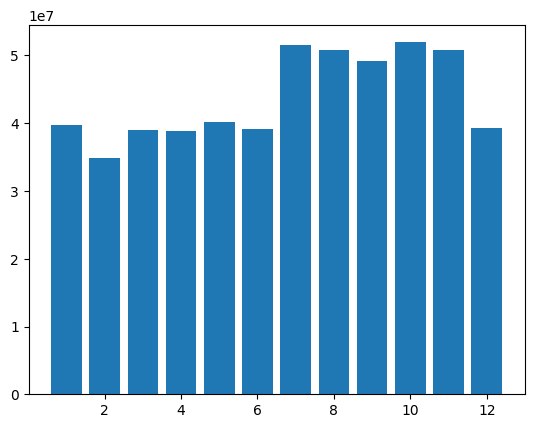

In [147]:
plt.bar(panjangbydate['bulan'],panjangbydate['panjang_atau_luas'])

In [150]:
# Mengfilter data untuk bulan Desember dan mengelompokkan berdasarkan kecamatan
result = data_cleaned_file[data_cleaned['bulan'] == 12].groupby('kecamatan')['panjang_atau_luas'].sum().reset_index()

# Menampilkan hasil
print(result)


            kecamatan  panjang_atau_luas
0              Cakung       1.776641e+06
1       Cempaka Putih       3.639400e+05
2          Cengkareng       1.999047e+06
3            Cilandak       1.494200e+06
4           Cilincing       3.100000e+01
5            Cipayung       1.125812e+06
6             Ciracas       8.380943e+05
7         Duren Sawit       8.122000e+05
8              Gambir       7.409000e+05
9   Grogol Petamburan       1.216890e+06
10          Jagakarsa       2.154345e+06
11         Jatinegara       1.220780e+06
12         Johar Baru       1.846980e+05
13          Kalideres       2.316093e+06
14     Kebayoran Baru       1.271000e+06
15     Kebayoran Lama       7.961110e+05
16        Kebon Jeruk       1.598577e+06
17      Kelapa Gading       2.480000e+02
18          Kemayoran       2.821000e+05
19          Kembangan       2.120567e+06
20               Koja       3.100000e+02
21        Kramat Jati       1.739100e+06
22            Makasar       1.224608e+06
23   Mampang Pra

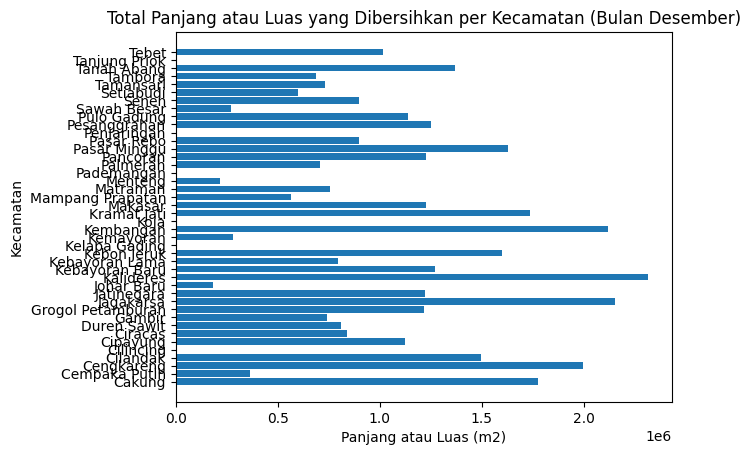

In [151]:
import matplotlib.pyplot as plt

# Membuat bar plot horizontal
plt.barh(result['kecamatan'], result['panjang_atau_luas'])

# Menambahkan judul dan label pada sumbu
plt.title('Total Panjang atau Luas yang Dibersihkan per Kecamatan (Bulan Desember)')
plt.xlabel('Panjang atau Luas (m2)')
plt.ylabel('Kecamatan')

# Menampilkan plot
plt.show()


<h3>data pembersihan 'panjang_atau_luas' berdasarkan tiap 'bulan' dan 'kecamatan' <h3>

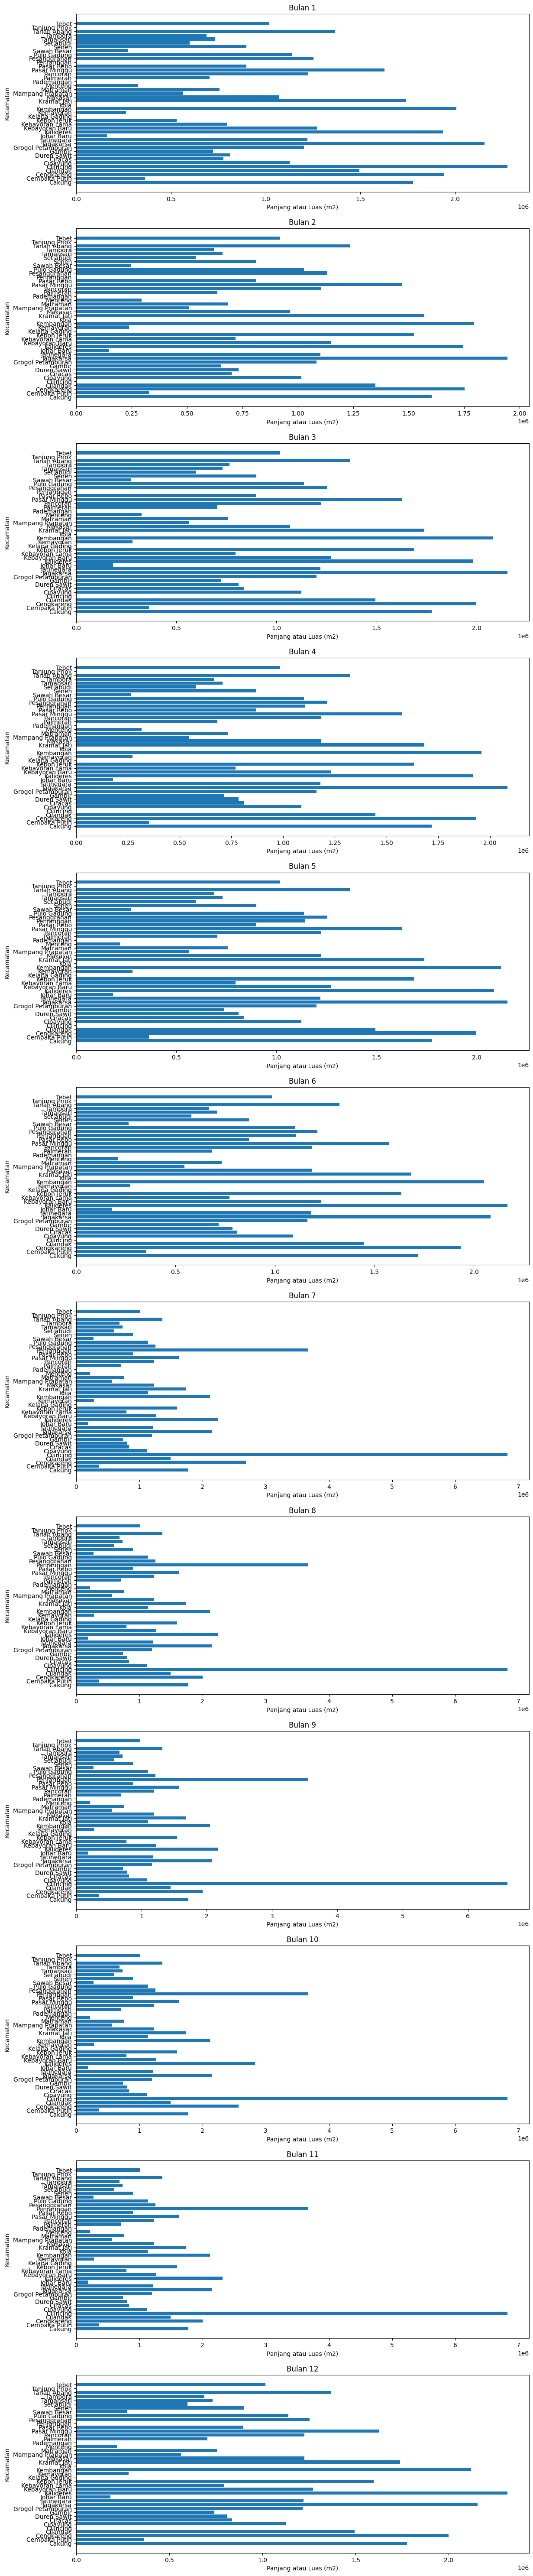

In [152]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan bulan dan kecamatan
result = data_cleaned_file.groupby(['bulan', 'kecamatan'])['panjang_atau_luas'].sum().reset_index()

# Membuat plot
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(12, 60))  # Membuat subplot untuk 12 bulan
fig.tight_layout(pad=4.0)

# Membuat bar plot untuk tiap bulan
for i, month in enumerate(range(1, 13)):
    # ax = axes[i // 2, i % 2]  # Akses subplot menggunakan dua indeks
    ax = axes[i]  # Akses subplot menggunakan dua indeks
    month_data = result[result['bulan'] == month]  # Filter data untuk bulan tersebut
    ax.barh(month_data['kecamatan'], month_data['panjang_atau_luas'])  # Plot bar horizontal
    ax.set_title(f'Bulan {month}')
    ax.set_xlabel('Panjang atau Luas (m2)')
    ax.set_ylabel('Kecamatan')

# Menampilkan plot
plt.show()


In [153]:
data_cleaned['volume_sampah_perhari'].unique()


array([1.200e+01, 0.000e+00, 1.000e+00, 2.000e+00, 6.000e+00, 4.000e+00,
       3.900e+01, 3.000e+00, 9.000e+00, 4.480e+00, 7.120e+00, 5.000e+00,
       2.240e+00, 7.000e+00, 2.100e+01, 1.750e+00, 8.000e+00, 9.360e+00,
       1.648e+01, 2.136e+01, 6.000e+01, 1.912e+01, 2.800e+01, 2.200e+01,
       4.500e+01, 1.000e+01, 3.000e+01, 6.900e+01, 1.424e+01, 2.300e+01,
       4.000e+01, 5.000e-01, 8.000e-01, 1.200e+00, 2.000e-01, 3.000e-01,
       1.500e+00, 1.500e+01, 1.800e+01, 1.000e-01, 2.500e-01, 1.600e+01,
       8.500e+00, 4.000e-01, 1.400e+00, 1.300e+00, 2.500e+00, 1.300e+01,
       1.400e+01, 2.600e+01, 1.700e+01, 2.000e+01, 7.500e-01, 7.000e-01,
       3.500e+00, 2.400e+01, 4.100e+01, 2.700e+01, 3.500e+01, 1.900e+01,
       5.900e+01, 1.800e+00, 2.200e+00, 4.200e+01, 3.600e+01, 6.500e+00,
       1.600e+00, 8.400e+01, 1.100e+01, 3.300e+01, 6.000e-01, 5.300e+01,
       3.120e+02, 5.400e+01, 6.400e+01, 3.200e+01, 4.500e+00, 2.500e+01,
       1.360e+02, 7.200e+01, 9.000e-01, 5.200e+01, 

In [57]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 521424 entries, 0 to 647168
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   periode_data             521424 non-null  int64  
 1   bulan                    521424 non-null  int64  
 2   titik_lokasi             521424 non-null  object 
 3   kecamatan                521424 non-null  object 
 4   wilayah                  521424 non-null  object 
 5   panjang_atau_luas        521424 non-null  float64
 6   satuan_panjang_luas      521424 non-null  object 
 7   tanggal                  521424 non-null  int64  
 8   volume_sampah_perhari    521424 non-null  object 
 9   panjang_atau_luas_in_m2  521424 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 43.8+ MB


In [126]:
resultv =  data.groupby(['bulan', 'kecamatan'])['volume_sampah_perhari'].sum().reset_index()
datadatadasdsdawddsdfsdfdfsdfefwefdfsdfefcfsdfdfsdfsefsdssdsdasdsjkbcvnsd fnscf
resultv

,bulan,kecamatan,volume_sampah_perhari
0,1,Cakung,1802.00
1,1,Cempaka Putih,4299.00
2,1,Cengkareng,3994.00
3,1,Cilandak,4174.68
4,1,Cilincing,983.00
...,...,...,...
499,12,Tamansari,910.50
500,12,Tambora,1420.00
501,12,Tanah Abang,1649.00
502,12,Tanjung Priok,1505.00


In [ ]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan bulan dan kecamatan
result = data.groupby(['bulan', 'kecamatan'])['panjang_atau_luas'].sum().reset_index()

# Membuat plot
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12, 40))  # Membuat subplot untuk 12 bulan
fig.tight_layout(pad=4.0)

# Membuat bar plot untuk tiap bulan
for i, month in enumerate(range(1, 13)):
    ax = axes[i // 2, i % 2]  # Akses subplot menggunakan dua indeks
    month_data = result[result['bulan'] == month]  # Filter data untuk bulan tersebut
    ax.barh(month_data['kecamatan'], month_data['panjang_atau_luas'])  # Plot bar horizontal
    ax.set_title(f'Bulan {month}')
    ax.set_xlabel('Panjang atau Luas (m2)')
    ax.set_ylabel('Kecamatan')

# Menampilkan plot
plt.show()


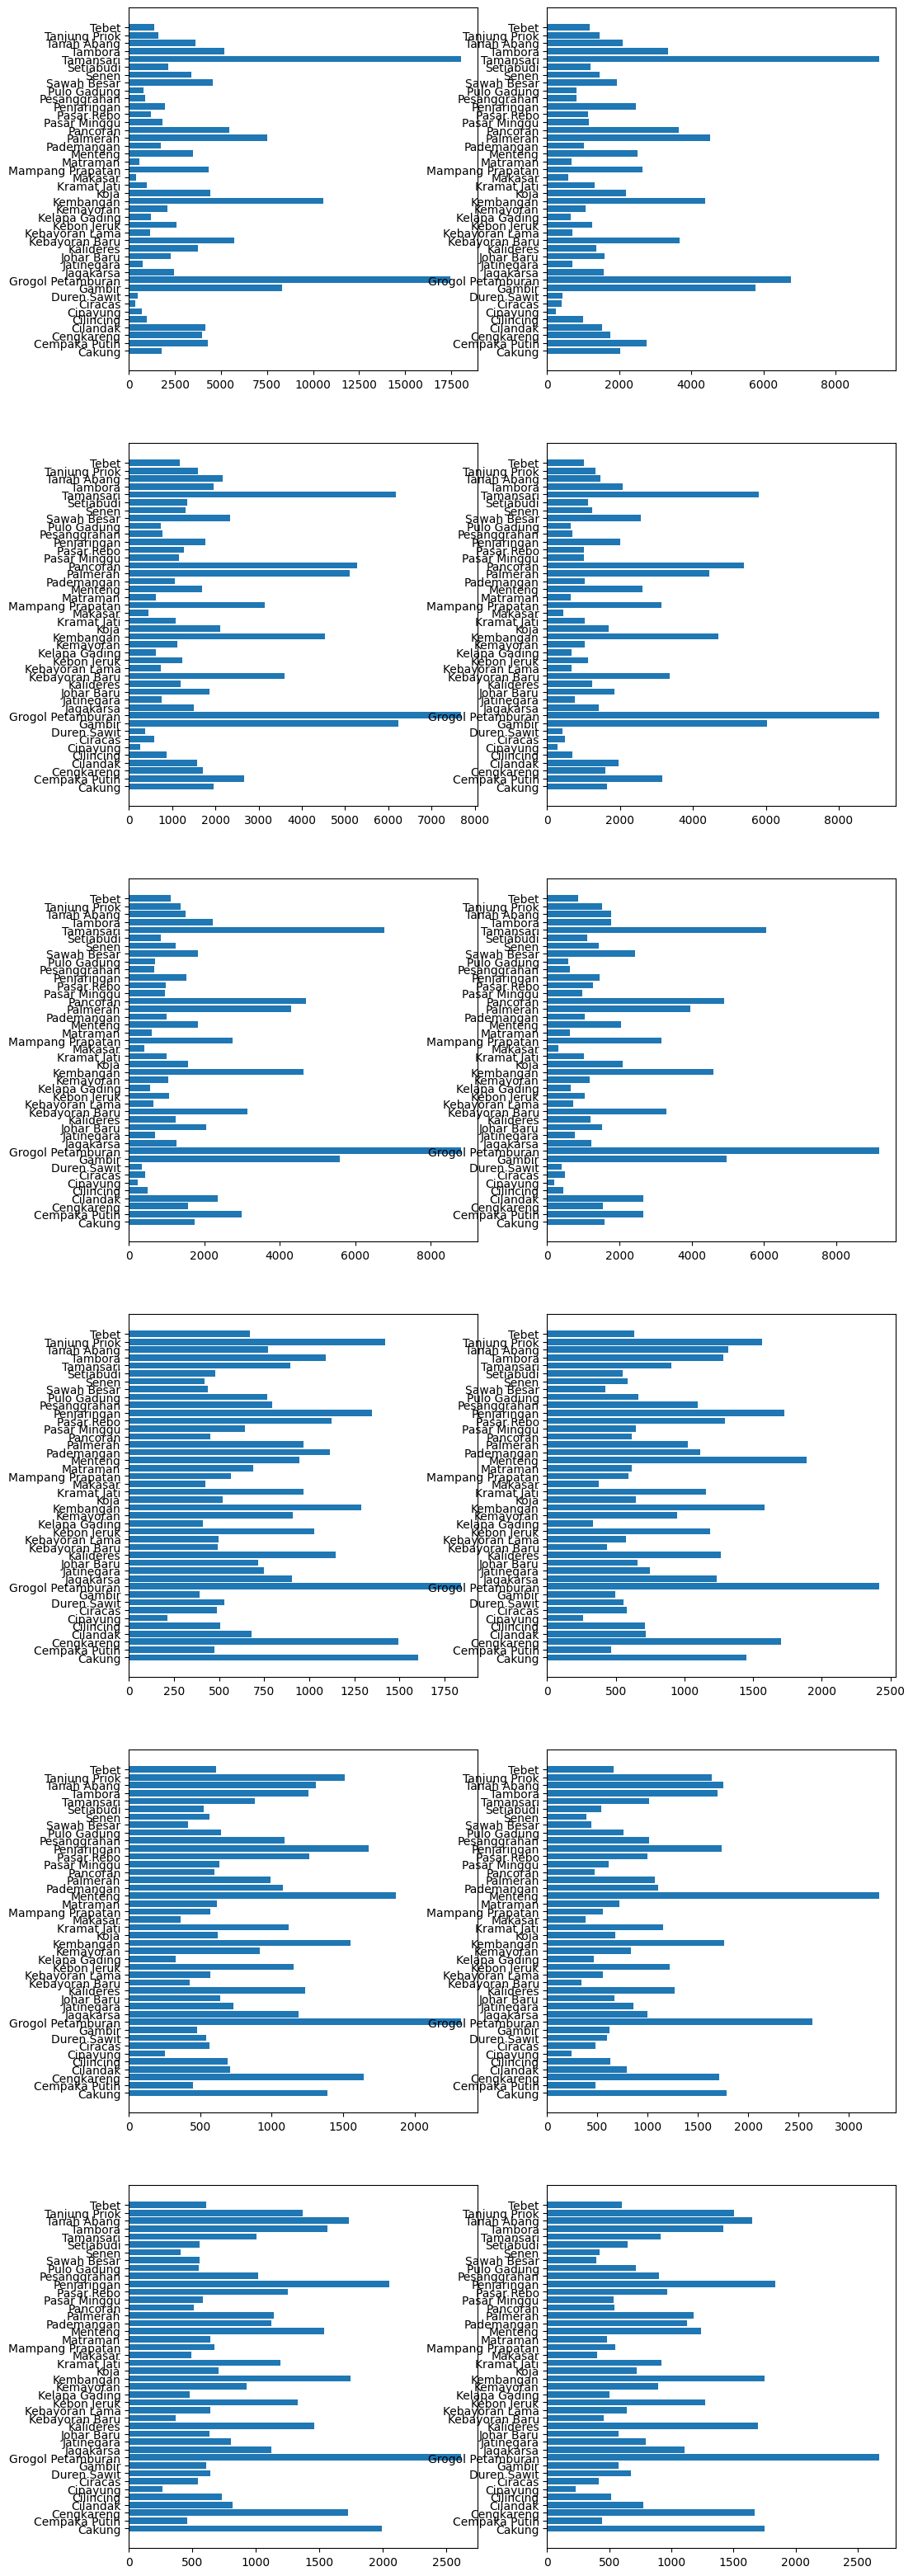

In [135]:
fig,axes = plt.subplots(nrows = 6,ncols = 2,figsize = (12,40))

for i,month in enumerate(range(1,13)):
    ax = axes[i //2,i % 2]
    hasil = resultv[resultv['bulan'] == month]
    ax.barh(hasil['kecamatan'],hasil['volume_sampah_perhari'])